In [164]:
## Long Short Term Memory (LSTM) Recurrent Neural Network (RNN)
## This video was guided by the following tutorial: https://www.youtube.com/watch?v=QIUxPv5PJOY

## This program considers the past 60 day stock price for predictions.

In [165]:
# !pip install --upgrade pandas-datareader
# !pip install yfinance

In [166]:
# Importing relevant libraries

import math
import pandas_datareader.data as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [167]:
# Retrieve stock quotes

import yfinance as yf
yf.pdr_override()

df = web.get_data_yahoo('MSFT', start='2017-01-01', end='2023-09-10')

# Display data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,62.790001,62.840000,62.130001,62.580002,57.254700,20694100
2017-01-04,62.480000,62.750000,62.119999,62.299999,56.998528,21340000
2017-01-05,62.189999,62.660000,62.029999,62.299999,56.998528,24876000
2017-01-06,62.299999,63.150002,62.040001,62.840000,57.492584,19922900
2017-01-09,62.759998,63.080002,62.540001,62.639999,57.309586,20382700
...,...,...,...,...,...,...
2023-09-01,331.309998,331.989990,326.779999,328.660004,328.660004,14931200
2023-09-05,329.000000,334.850006,328.660004,333.549988,333.549988,18553900
2023-09-06,333.380005,334.459991,330.179993,332.880005,332.880005,17535800


In [168]:
# Retrieve matrix dimensions

df.shape

(1682, 6)

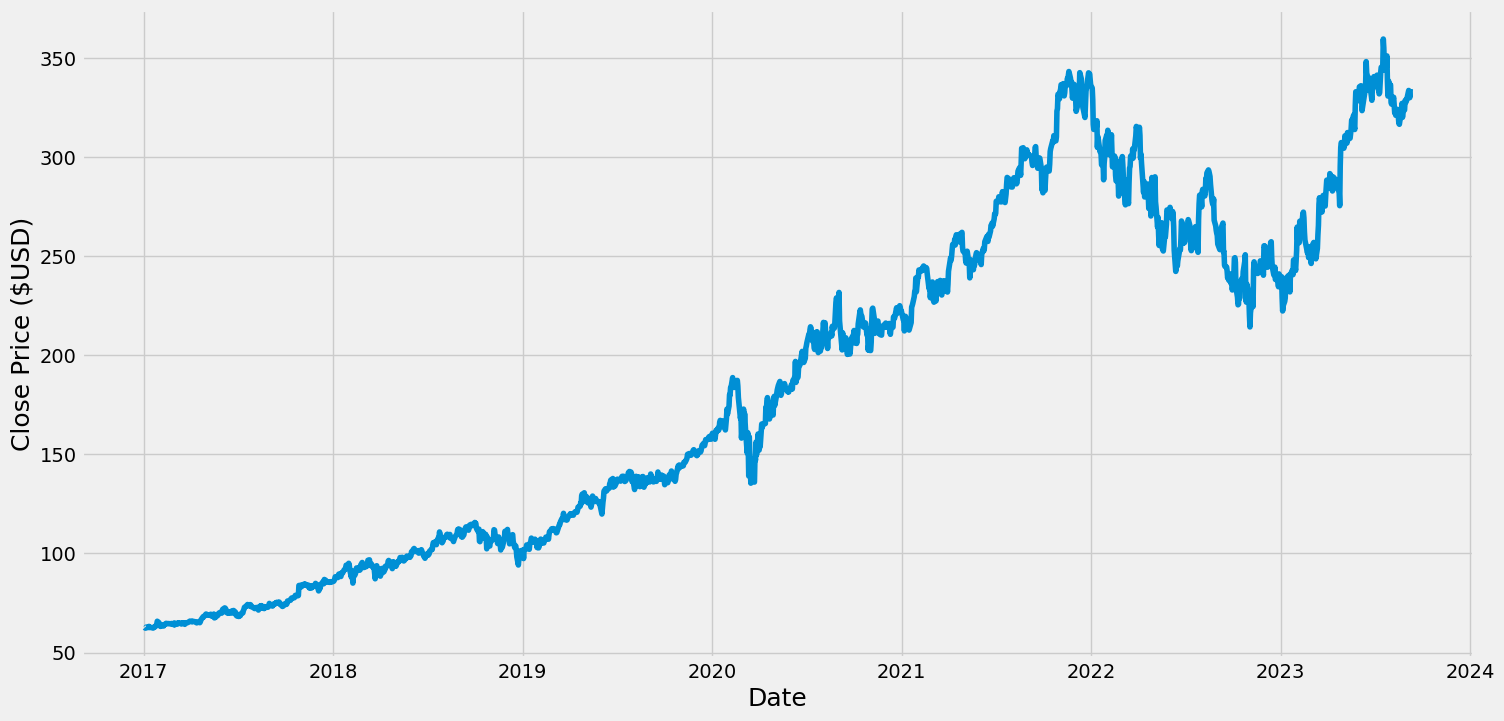

In [169]:
# Visualize the closing price

plt.figure(figsize=(16,8))
plt.title='Close Price History'
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ($USD)', fontsize=18)

plt.show()

In [170]:
# Create a new dataframe with only closing prices

data = df.filter(['Close'])

# Convert dataframe to a numpy array
dataset = data.values

# Compute row count to train the model on => 80% of data for training
training_data_len = math.ceil(len(dataset) * 0.8)
print(training_data_len)

1346


In [171]:
# Scale the data for preprocessing

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)   # Computes min and max values for scaling, then transforms. Standardizes data from 0 to 1 inclusive

scaled_data

array([[0.00094217],
       [0.        ],
       [0.        ],
       ...,
       [0.91046137],
       [0.90046776],
       [0.91513846]])

In [172]:
# Create the training data set

# Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]

# Split data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])   # Positions 0 to 59
  y_train.append(train_data[i, 0])        # Position 60
  if i<= 61:
    print(x_train)
    print(y_train)
    print()


[array([0.00094217, 0.        , 0.        , 0.00181702, 0.00114405,
       0.00107675, 0.00299472, 0.00104311, 0.00134595, 0.00077391,
       0.00067297, 0.        , 0.00148054, 0.0022208 , 0.00410512,
       0.0046435 , 0.00662875, 0.01170968, 0.00952252, 0.00790741,
       0.00430702, 0.00292742, 0.0046435 , 0.0045089 , 0.00380229,
       0.00349945, 0.00592213, 0.00572025, 0.00814295, 0.00763821,
       0.00750362, 0.00746996, 0.00780647, 0.00736902, 0.0069316 ,
       0.00780647, 0.00780647, 0.00649418, 0.00565295, 0.00888322,
       0.0057539 , 0.00656146, 0.00662875, 0.00706619, 0.00905144,
       0.0081766 , 0.00884956, 0.00810929, 0.00709985, 0.00824389,
       0.00787375, 0.00864768, 0.00884956, 0.00642686, 0.00918604,
       0.00864768, 0.00901781, 0.00942158, 0.01006091, 0.01066658])]
[0.011474140955988393]

[array([0.00094217, 0.        , 0.        , 0.00181702, 0.00114405,
       0.00107675, 0.00299472, 0.00104311, 0.00134595, 0.00077391,
       0.00067297, 0.        , 0.0

In [173]:
# Convert x_train and y_train to numpy arrays

x_train, y_train = np.array(x_train), np.array(y_train)

In [174]:
# Reshape the x_train data set => Add third column

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1286, 60, 1)

In [175]:
# Build the LSTM Model

model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False)) 
model.add(Dense(32))

model.add(Dense(1))
# model.add(Dense(10))


In [176]:
# Compile the model

model.compile(optimizer='adam', loss='mean_squared_error')
#model.compile(optimizer='adam', loss='mean_absolute_error')



In [177]:
# Train the model

model.fit(x_train, y_train, batch_size=1, epochs=2)

Epoch 1/2
1286/1286 [==============================] - 12s 9ms/step - loss: 0.0012
Epoch 2/2
1286/1286 [==============================] - 10s 8ms/step - loss: 8.7522e-04


In [178]:
# Create the testing data set

# Array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [179]:
# Convert the data to a numpy array

x_test = np.array(x_test)


In [180]:
# Reshape the data

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))  # Num of rows, num of columns, num of features (just the close price)


In [181]:
# Retrieve model's predicted price values

predictions = model.predict(x_test)
predictions.shape

11/11 [==============================] - 0s 6ms/step


(336, 1)

In [182]:
predictions = scaler.inverse_transform(predictions)   # Unscale predictions to compare to original closing prices (y_test)

In [183]:
# Evaluate root mean square error (RMSE) => Standard deviation of the residuals

rmse = np.sqrt( np.mean( predictions - y_test )**2 )
print(rmse)

2.2863101050967263


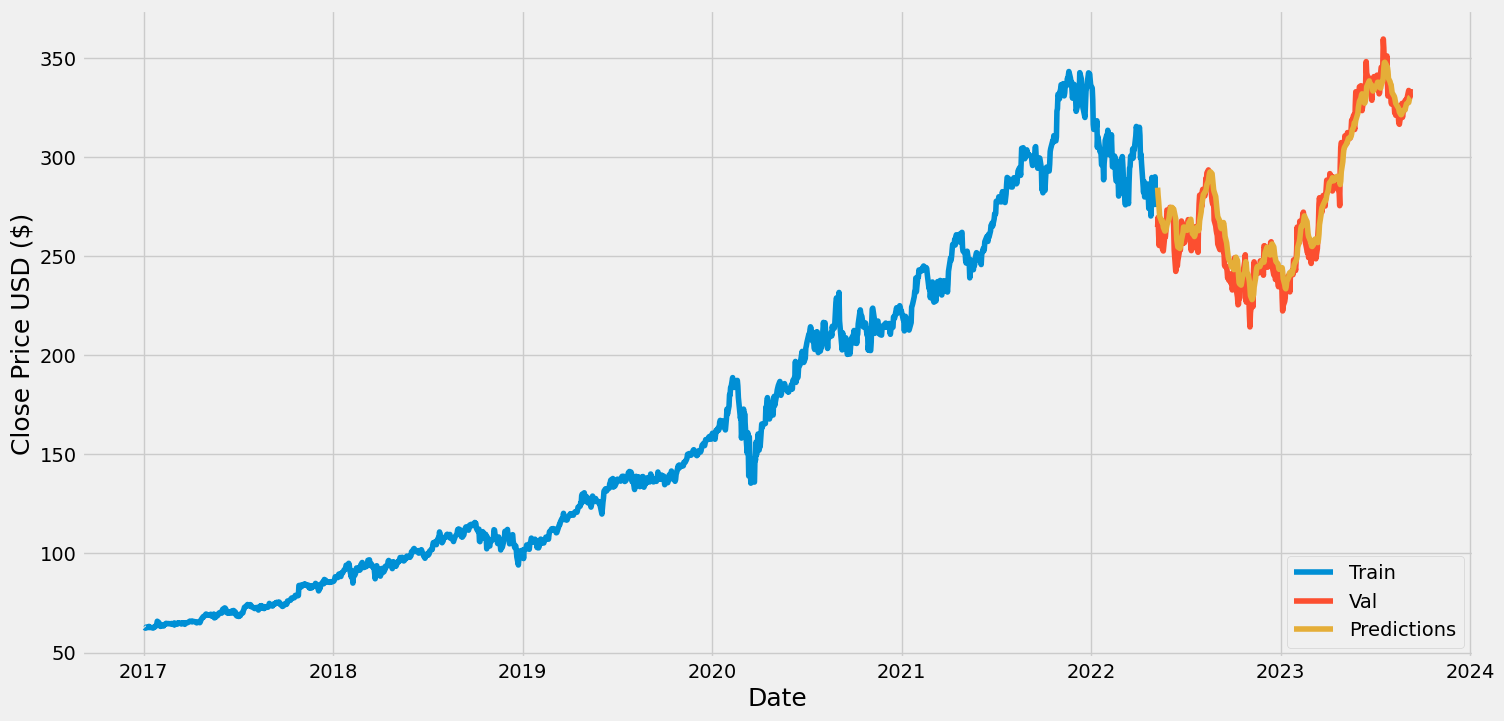

In [184]:
# Plot the data

train = data[:training_data_len].copy()
valid = data[training_data_len:].copy()

valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,8))
plt.title='Model'
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [185]:
# Display valid and predicted prices

valid

,Close,Predictions
Date,,
2022-05-09,264.579987,284.509003
2022-05-10,269.500000,280.420868
2022-05-11,260.549988,277.595551
2022-05-12,255.350006,274.039551
2022-05-13,261.119995,270.053253
...,...,...
2023-09-01,328.660004,326.881744
2023-09-05,333.549988,327.462341
2023-09-06,332.880005,328.838196


In [186]:
# Predict closing price for ^GSPC stock on december 18, 2019

#.Retrieve actual quote
apple_quote=web.get_data_yahoo('MSFT', start='2012-01-01', end='2023-09-05')

# Create a new dataframe
new_df = apple_quote.filter(['Close'])

# Retrieve only last 60 days of data and convert to array
last_sixty_days = new_df[-60:].values

# Scale the data to [0:1]
last_sixty_days_scaled = scaler.transform(last_sixty_days)

# Initialize list
new_x_test = []
new_x_test.append(last_sixty_days_scaled)

# Convert to numpy array
new_x_test = np.array(new_x_test)

# Reshape
new_x_test = np.reshape(new_x_test, (new_x_test.shape[0], new_x_test.shape[1], 1))
print(new_x_test)
# Calculate predictions
pred_price = model.predict(new_x_test)

# Rescale predictions
pred_price = scaler.inverse_transform(pred_price)

print(pred_price)

[*********************100%%**********************]  1 of 1 completed
[[[0.88482122]
  [0.88996944]
  [0.90699558]
  [0.91520582]
  [0.92546857]
  [0.9616744 ]
  [0.94225915]
  [0.92785759]
  [0.91274944]
  [0.93344325]
  [0.9176621 ]
  [0.89605981]
  [0.91614797]
  [0.92045498]
  [0.91776304]
  [0.93623614]
  [0.92765571]
  [0.92819409]
  [0.93869241]
  [0.92506481]
  [0.90692821]
  [0.90908177]
  [0.92499755]
  [0.94336961]
  [0.95205088]
  [0.95369972]
  [1.        ]
  [0.985161  ]
  [0.9575356 ]
  [0.94710454]
  [0.95161343]
  [0.97136519]
  [0.92691543]
  [0.90319328]
  [0.92893437]
  [0.92069054]
  [0.92210372]
  [0.89235845]
  [0.88953199]
  [0.89330061]
  [0.90114066]
  [0.88747938]
  [0.87462573]
  [0.87698106]
  [0.8705206 ]
  [0.8807161 ]
  [0.87338065]
  [0.86846799]
  [0.85662375]
  [0.85527783]
  [0.87344801]
  [0.87539958]
  [0.89067603]
  [0.86702113]
  [0.87714936]
  [0.87957206]
  [0.89542048]
  [0.89669914]
  [0.89323335]
  [0.89626169]]]
1/1 [========================

In [187]:
# Evaluate efficacy of model

# Retrieve actual future quote data
actual_apple_quote=web.get_data_yahoo('MSFT', start='2023-09-02', end='2023-09-07')
print(actual_apple_quote['Close'])

[*********************100%%**********************]  1 of 1 completed
Date
2023-09-05    333.549988
2023-09-06    332.880005
Name: Close, dtype: float64


In [188]:
## Below code added as of 1/1/2023

In [189]:
# Calculate confusion matrix from actual and predicted values

y_actual = y_test
y_hat = predictions

overshot = 0
undershot = 0


for i in range(0, len(y_actual)):
  if y_actual[i] > y_hat[i]:
    undershot+=1
  else:
    overshot+=1


print(np.average(y_actual-y_hat))
print(overshot, undershot)



-2.2863101050967263
198 138
